### Predicting Sunday NewsPaper Circulation based on weekly newspaper Circulation

Design and implement simple linear regression model to predict sunday newspaper 

circulation based on daily newspaper circulation


predict sunday paper circulation for 200,300 and 500 daily circulation

Evaluate model with R-square and Adjusted R -Square


#### Import libraries

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # usef for ML algorithms

In [5]:
os.getcwd() # for getting current working directory

'c:\\Users\\Amey\\Desktop\\Amey Study\\Data Science\\TubeDude\\Data Science\\LearningNotebooksbyAmey'

In [6]:
df = pd.read_csv("Datasets/1_NewspaperData.csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


#### Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [8]:
df.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [9]:
df[['daily','sunday']].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


That means there is high co-relation between our target variable and feather

#### Plotting data for better Understanding

[]

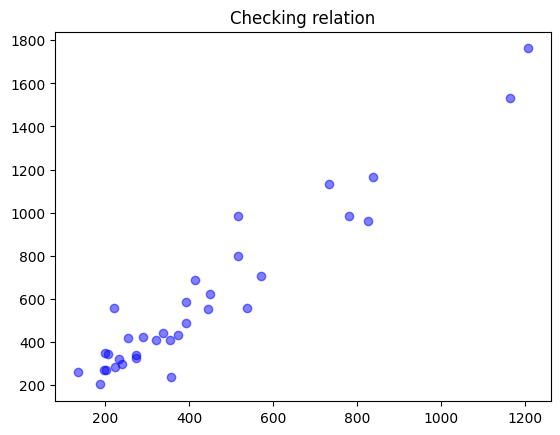

In [10]:
# aplha is for transperency
plt.scatter(x= df['daily'], y= df['sunday'], color = 'blue',alpha = 0.5)
plt.title("Checking relation")
plt.plot()

Seems to be linear relationship

In [11]:
model = smf.ols('sunday~daily',data=df).fit() 
# ordinary Least square method for calculating co-efficients
# it means sunday column is explained by column daily
# and then fit() - computes coefficients, estimates variance, calculates t-stats, p-values, and stores residuals

In [12]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

here we found values of beeta_0 and (Intercept) beeta_1 (coefficient of x, daily columns coefficient here)

Hence - 

y = Beeta0 + Beeta1*daily + Error(e)

~ → “is explained by”

In [13]:
#t and p-Values

print(f'model t-values:\n{model.tvalues}\n-----------------\nmodel p-values: \n{model.pvalues}')    

model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
-----------------
model p-values: 
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


- The t-statistic tests whether the regression coefficient is significantly different from zero. How many standard errors away from zero is this coefficient?
- The p-value indicates the probability of observing such a t-value under the null hypothesis.
- Since the p-value for daily is far below 0.05, we reject the null hypothesis and conclude a significant linear relationship.

### T - values - 
Intercept (0.386)

 - Very close to 0

- Means intercept is not clearly different from zero

daily (18.93)

- HUGE value

- Means the slope is very strongly different from zero

- Practically screams: “this relationship is real”

Rule of thumb:

- |t| < 2 → weak / not significant

- |t| > 2 → significant

- |t| > 10 → extremely strong

### P - Values - 
Intercept (0.70)
- 70% chance this value happens by randomness
- ❌ Not significant.

daily (6 × 10⁻¹⁹)
- That’s:0.000000000000000000601
- Basically zero
- ✅ Extremely statistically significant

### To summerise if p value for any feature (variable) is < 0.05 , 
### that variable is important , and suggest not drop from dataset

In [14]:
# to prdecit for 200 daily circulation
13.835630 + (1.339715*200)

281.77862999999996

### Prediction

In [19]:
data_pred = pd.DataFrame([200,300,500],columns=['daily'])
data_pred

,daily
0,200
1,300
2,500


In [20]:
model.predict(data_pred) # predict required data in 2 D dataframe

0    281.778581
1    415.750057
2    683.693009
dtype: float64

### To Test Prediction

In [21]:
model.rsquared, model.rsquared_adj

(np.float64(0.9180596895873295), np.float64(0.9154990548869336))

### R-squared - 
- tells us how well the model fits the data. Closer to 1 = better fit.
- Example: If its value is 0.91, the model explains 91% of the variation in y.
- But it has a quirk - it always increases when we add more features, even useless ones!

### Adjusted R-squared deals with this issue
- fixes this quirk by penalizing extra features that don't help.
- Rule of thumg: If a feature doesn't improve the model enough, Adjusted R2 decreases.